# Maximum Independent Set problem

On a graph $G=(V,E)$, an _independent set_ $S$ is a a subset of vertices that has no common edges
$$\forall x,y \in S,\quad xy\notin E.$$
A _maximum independent set_ is an independent set of maximum cardinality.

Consider the following graph $G$

```text
 5       4
  \     /
   \   /
     1
    / \
   /   \
  2 --- 3
```

There are two MIS in this graph: $(2,4,5)$ and $(3,4,5)$.

We can represent $G$ in Julia using its size $n=5$ and the list of its edges, implicitly labelling the vertices from 1 to $n$.

In [1]:
n = 5
e = Array([(1, 2),(1, 3),(1, 4),(1, 5),(2, 3)]);

Using [`SimpleGraphs`](https://github.com/scheinerman/SimpleGraphs.jl) (or other libraries), we can inspect the graph defined by the list of edges `e`.

In [2]:
using SimpleGraphs


In [3]:
G = IntGraph(n)
add_edges!(G, e)
println("Vertices: $(vlist(G))")
println("Edges: $(elist(G))")

Vertices: [1, 2, 3, 4, 5]
Edges: [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3)]


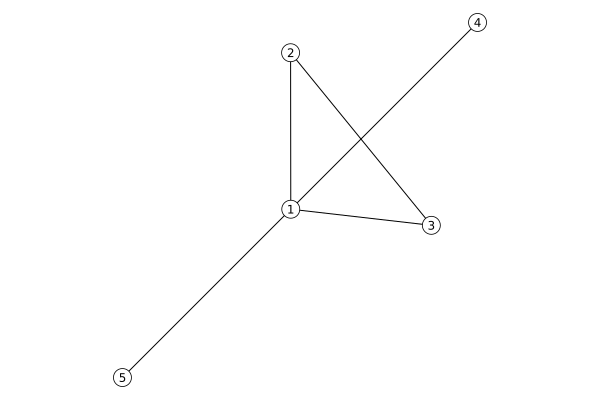

In [4]:
using DrawSimpleGraphs

embed(G, :spring)
set_vertex_size(G, 10)
draw(G)
draw_labels(G)

## Solving with linear programing 

A subset of vertices $S$ of $V$ is given by the binary variables $x_i$, $i\in\llbracket 1,n\rrbracket$, that are set to $1$ or $0$ wheter the vertex $i$ belongs or does not belong to $S$.

A subset $S$ is a MIS if
$$\sum_{i=1}^n x_i$$
is maximal, under the constraints that
$$\forall i,j\in E,\quad x_i + x_j \leq 1.$$

This is easily implemented using [`JuMP`](https://jump.dev/), a linear programming tool that uses solvers like `GLPK` to find optimums.

In [5]:
using JuMP
using GLPK

In [6]:
model = Model(GLPK.Optimizer)
@variable(model, x[i=1:n], Bin)
@objective(model, Max, sum(x))
@constraint(model, con[i=1:n], x[e[i][1]] + x[e[i][2]] <= 1)
print(model)

In [7]:
optimize!(model)

In [8]:
@show termination_status(model);
@show primal_status(model);
@show dual_status(model);
@show objective_value(model);
@show value.(x);

termination_status(model) = MathOptInterface.OPTIMAL
primal_status(model) = MathOptInterface.FEASIBLE_POINT
dual_status(model) = MathOptInterface.NO_SOLUTION
objective_value(model) = 3.0
value.(x) = [0.0, 0.0, 1.0, 1.0, 1.0]


## Results

In [9]:
println("The cardinal of the MIS is $(objective_value(model)).")
println("The MIS is $([i for (i, val) in enumerate(value.(x)) if val == 1]).")

The cardinal of the MIS is 3.0.
The MIS is [3, 4, 5].
